In [1]:
# imports libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold



# EDA

In [2]:
# Import database
# Check the 3 csv files
df_2018=pd.read_csv("data_2018.csv")
df_2019=pd.read_csv("data_2019.csv")
df_2020=pd.read_csv("data_2020.csv")

# Working on copies of the original dataframes
df18=df_2018.copy()
df19=df_2019.copy()
df20=df_2020.copy()

In [3]:
# Check correct display of the files
print(df18.head())  #26 columns
print(df19.head())  #26 columns
print(df20.head())  #27 columns

   sno  district       mandal      village    lat_gis   long_gis   gwl  \
0    1  ADILABAD     Adilabad     Adilabad  19.668300  78.524700  5.09   
1    2  ADILABAD  Bazarhatnur  Bazarhatnur  19.458888  78.350833  5.10   
2    3  ADILABAD  Gudihatnoor  Gudihatnoor  19.525555  78.512222  4.98   
3    4  ADILABAD      Jainath      Jainath  19.730555  78.640000  5.75   
4    5  ADILABAD      Narnoor      Narnoor  19.495665  78.852654  2.15   

              season    pH   E.C  ...    SO4     Na    K  Ca      Mg  \
0  postmonsoon 2018   8.28   745  ...   46.0   49.0  4.0  48  38.896   
1  postmonsoon 2018   8.29   921  ...   68.0   42.0  5.0  56  63.206   
2  postmonsoon 2018   7.69   510  ...   44.0   45.0  2.0  24  38.896   
3  postmonsoon 2018   8.09   422  ...   35.0   27.0  1.0  32  19.448   
4  postmonsoon 2018   8.21  2321  ...  280.0  298.0  5.0  56  92.378   

          T.H       SAR  Classification  RSC  meq  / L  Classification.1  
0  279.934211  1.273328            C2S1      -1

In [4]:
# Check different columns
df18.info()
df19.info()
df20.info()
# 1 column is empty in 2020

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               374 non-null    int64  
 1   district          374 non-null    object 
 2   mandal            374 non-null    object 
 3   village           374 non-null    object 
 4   lat_gis           374 non-null    float64
 5   long_gis          374 non-null    float64
 6   gwl               371 non-null    float64
 7   season            374 non-null    object 
 8   pH                374 non-null    float64
 9   E.C               374 non-null    int64  
 10  TDS               374 non-null    float64
 11  CO3               374 non-null    int64  
 12  HCO3              374 non-null    float64
 13  Cl                374 non-null    int64  
 14  F                 374 non-null    float64
 15  NO3               374 non-null    float64
 16  SO4               374 non-null    float64
 1

In [5]:
# Drop column 'Unnamed: 8' from df_2020
df20 = df20.drop(columns=['Unnamed: 8'])

#### Anomalies

In [6]:
### Columns' names are different in dataframes
# Compare columns' names of two dataframes
for i in range (len(df18.columns)):
    if df18.columns[i] != df19.columns[i] != df20.columns[i]:
        print(f"{df18.columns[i]} {df19.columns[i]} {df20.columns[i]}")
# datas from 2019 have different columns' names than 2018 and 2020

E.C EC E.C
CO3 CO_-2  CO3
HCO3 HCO_ -  HCO3
Cl Cl - Cl
F F - F
NO3  NO3-  NO3 
SO4 SO4-2 SO4
Na Na+ Na
K K+ K
Ca Ca+2 Ca
Mg Mg+2 Mg


In [7]:
# Rename columns from 2019 dataframe
# df19.columns = df18.columns  # This one is less flexible than using .rename() from pandas
df19 = df19.rename(columns=dict(zip(df19.columns, df18.columns)))

#### Duplicates

In [8]:
# Check total duplicates
df18.duplicated().sum(), df19.duplicated().sum(), df20.duplicated().sum()

(0, 0, 0)

#### Concatenate

In [9]:
df=pd.concat([df18, df19, df20])

In [10]:
print(df.head()) 

   sno  district       mandal      village    lat_gis   long_gis   gwl  \
0    1  ADILABAD     Adilabad     Adilabad  19.668300  78.524700  5.09   
1    2  ADILABAD  Bazarhatnur  Bazarhatnur  19.458888  78.350833  5.10   
2    3  ADILABAD  Gudihatnoor  Gudihatnoor  19.525555  78.512222  4.98   
3    4  ADILABAD      Jainath      Jainath  19.730555  78.640000  5.75   
4    5  ADILABAD      Narnoor      Narnoor  19.495665  78.852654  2.15   

              season    pH   E.C  ...    SO4     Na    K    Ca      Mg  \
0  postmonsoon 2018   8.28   745  ...   46.0   49.0  4.0  48.0  38.896   
1  postmonsoon 2018   8.29   921  ...   68.0   42.0  5.0  56.0  63.206   
2  postmonsoon 2018   7.69   510  ...   44.0   45.0  2.0  24.0  38.896   
3  postmonsoon 2018   8.09   422  ...   35.0   27.0  1.0  32.0  19.448   
4  postmonsoon 2018   8.21  2321  ...  280.0  298.0  5.0  56.0  92.378   

          T.H       SAR  Classification  RSC  meq  / L  Classification.1  
0  279.934211  1.273328            

#### Missing datas

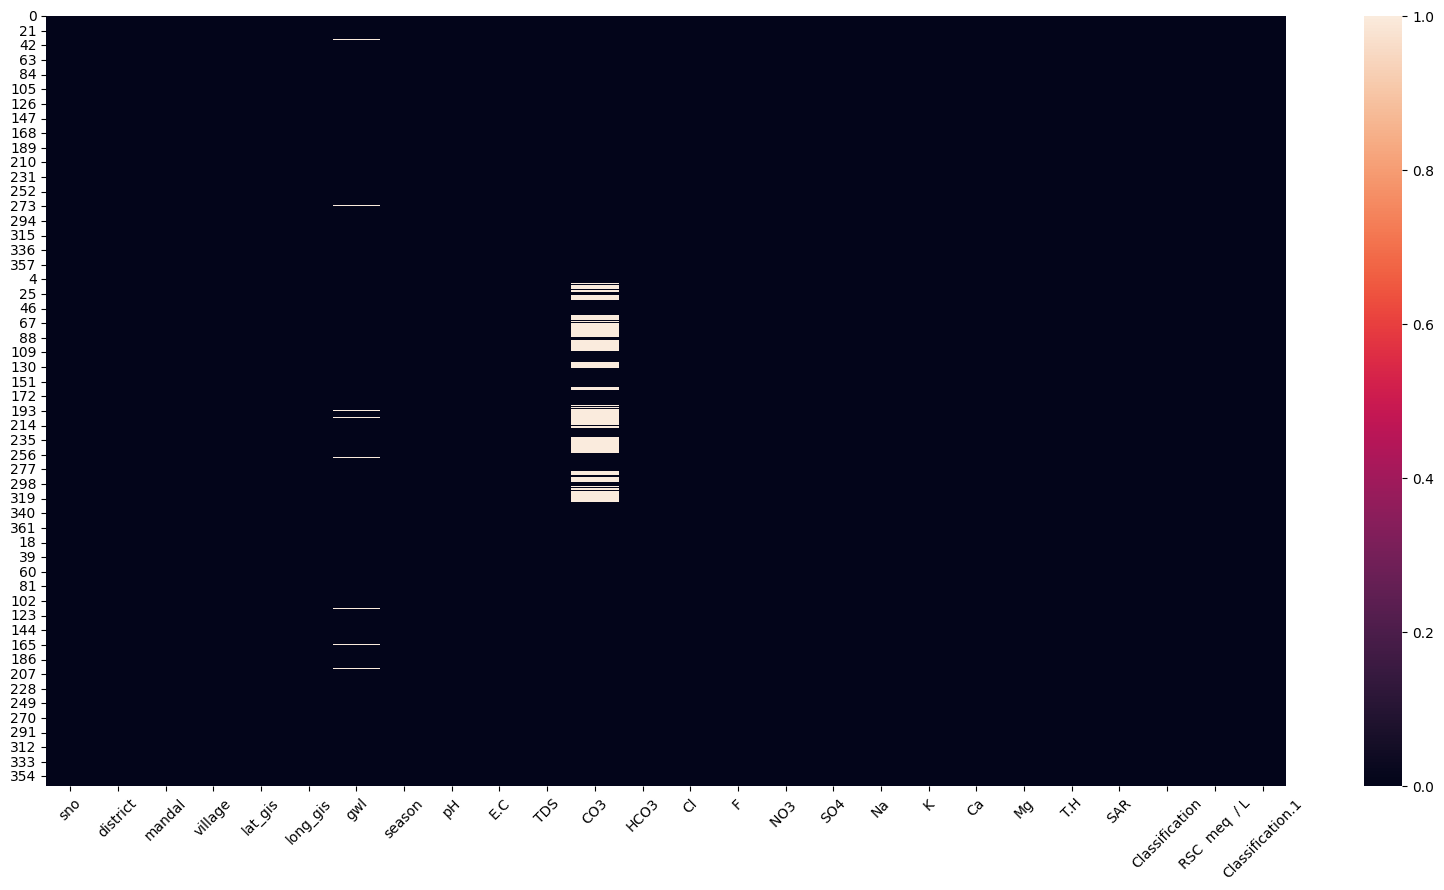

In [11]:
# Visualize missing datas
plt.figure(figsize=(20,10))     
sns.heatmap(df.isna()) 
plt.xticks(rotation=45)   
plt.show() 

In [12]:
# Check for percentages of missing values in each dataframe
(df.isna().sum()/df.shape[0] * 100).sort_values(ascending=True).round(2)

# drop 1% missing (I won't take any risk of modifying for so few)
# 14% : check by boxplot (if not many outliers : mean, else median)

sno                  0.00
Classification       0.00
SAR                  0.00
T.H                  0.00
Mg                   0.00
Ca                   0.00
K                    0.00
Na                   0.00
SO4                  0.00
NO3                  0.00
F                    0.00
Cl                   0.00
HCO3                 0.00
TDS                  0.00
E.C                  0.00
pH                   0.00
season               0.00
long_gis             0.00
lat_gis              0.00
village              0.00
mandal               0.00
district             0.00
RSC  meq  / L        0.00
Classification.1     0.00
gwl                  0.99
CO3                 14.47
dtype: float64

<Axes: xlabel='CO3'>

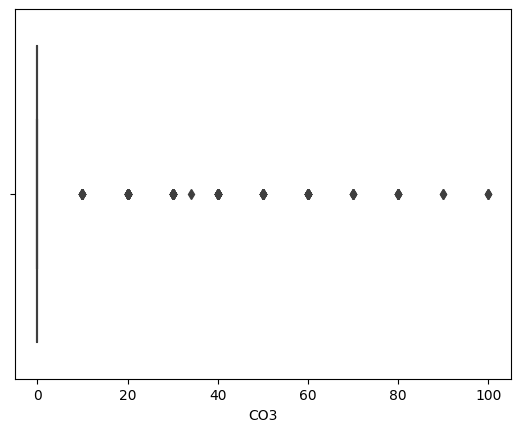

In [13]:
# Check outliers for CO3
sns.boxplot(x=df['CO3'])  

In [14]:
# Check total number of missing values for each different value in CO3 column
df['CO3'].value_counts()

CO3
0.000      780
20.000      44
30.000      29
40.000      27
60.000      21
50.000      15
10.000      11
80.000       8
70.000       5
100.000      3
90.000       2
34.034       1
Name: count, dtype: int64

In [15]:
# Créer un dictionnaire de correspondance pour les renommages
renaming_dict = {
    'C2S1': 'Moderate',
    'C3S1': 'Poor',
    'C4S2': 'Bad',
    'C4S1': 'Bad',
    'C3S2': 'Poor',
    'C4S4': 'Bad',
    'C4S3': 'Bad',
    'C1S1': 'Good',
    'C3S4': 'Bad',
    'C3S3': 'Poor',
    'C2S2': 'Moderate'
}

# Appliquer les renommages à la colonne 'Classification'
df['Classification'] = df['Classification'].map(renaming_dict)


# Correlations

sno: Numéro de série ou d'identification unique pour chaque enregistrement.

district: District géographique où les données ont été collectées.

mandal: Sous-région administrative ou administrative dans le district.

village: Village ou zone géographique plus petite que le mandal.

lat_gis: Latitude géographique du point de collecte des données.

long_gis: Longitude géographique du point de collecte des données.

gwl: Niveau d'eau souterraine (Ground Water Level) mesuré.

season: Saison pendant laquelle les données ont été collectées.

pH: Mesure de l'acidité ou de l'alcalinité de l'eau.

E.C: Conductivité électrique, indiquant la capacité de l'eau à 
conduire le courant électrique.

SO4, Na, K, Ca, Mg: Concentrations en ions chimiques spécifiques.

T.H: Dureté totale de l'eau.

SAR: Sodium Adsorption Ratio, un indicateur de la qualité de l'eau pour l'irrigation.

Classification: Classification ou catégorisation de la qualité de l'eau

RSC: Residual Sodium Carbonate, un paramètre lié à la qualité de l'eau pour l'irrigation.

                    sno   lat_gis  long_gis       gwl       E.C       TDS  \
sno            1.000000 -0.165918 -0.207362  0.121790  0.063043  0.063043   
lat_gis       -0.165918  1.000000  0.112274 -0.077241 -0.287615 -0.287615   
long_gis      -0.207362  0.112274  1.000000 -0.228986 -0.074828 -0.074828   
gwl            0.121790 -0.077241 -0.228986  1.000000 -0.032740 -0.032740   
E.C            0.063043 -0.287615 -0.074828 -0.032740  1.000000  1.000000   
TDS            0.063043 -0.287615 -0.074828 -0.032740  1.000000  1.000000   
CO3           -0.042642 -0.165900  0.046555 -0.028910 -0.076437 -0.076437   
HCO3           0.034984 -0.193656 -0.060802 -0.007824  0.604290  0.604290   
Cl             0.085927 -0.263277 -0.091633 -0.026457  0.937154  0.937154   
F              0.077999 -0.094808 -0.014280  0.068213  0.078763  0.078763   
NO3           -0.014363 -0.194244  0.015500 -0.000483  0.565982  0.565982   
SO4           -0.027904  0.158356  0.097572 -0.133135  0.403046  0.403046   

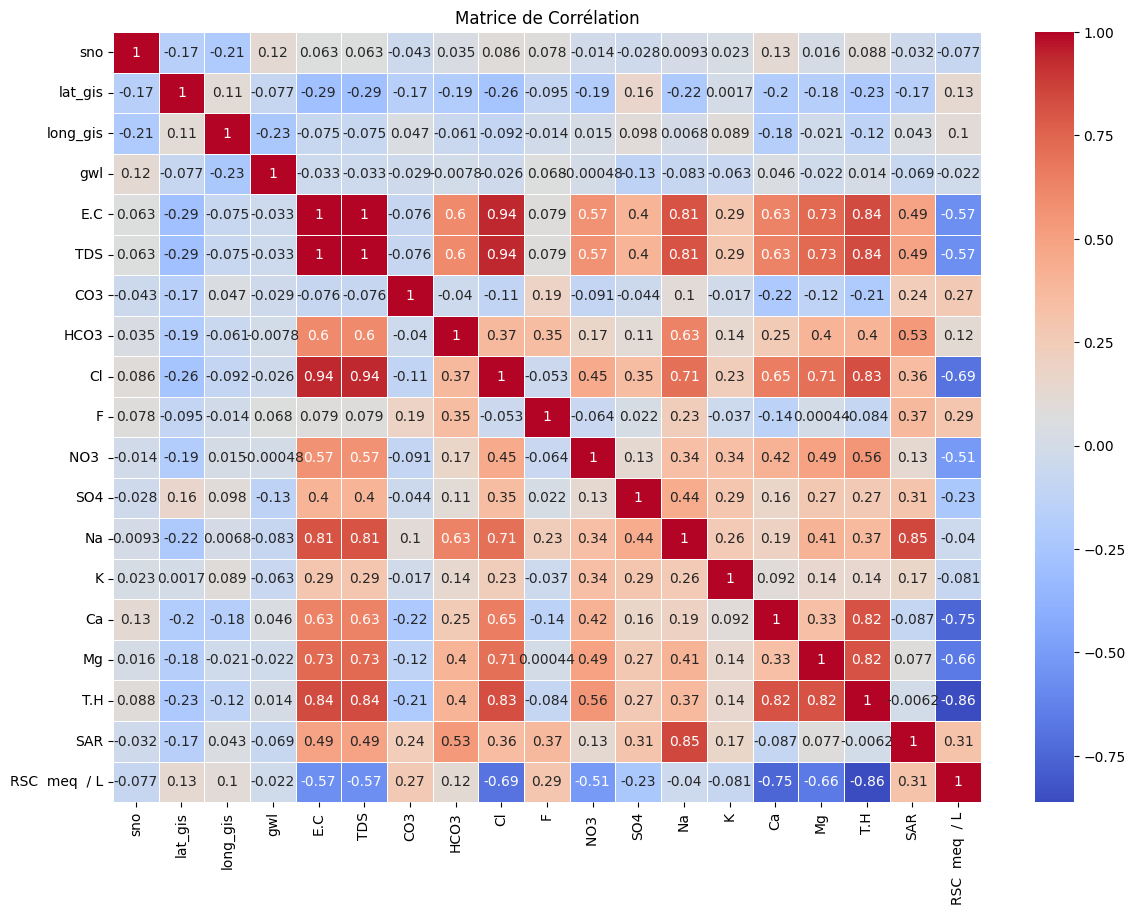

In [16]:


# Exclure les colonnes non numériques
numeric_columns = df.select_dtypes(include=['number']).columns

# Calculer la matrice de corrélation
correlation_matrix = df[numeric_columns].corr()
print(correlation_matrix)

# Créer une heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Matrice de Corrélation")
plt.show()


In [17]:
print(df.head()) 

   sno  district       mandal      village    lat_gis   long_gis   gwl  \
0    1  ADILABAD     Adilabad     Adilabad  19.668300  78.524700  5.09   
1    2  ADILABAD  Bazarhatnur  Bazarhatnur  19.458888  78.350833  5.10   
2    3  ADILABAD  Gudihatnoor  Gudihatnoor  19.525555  78.512222  4.98   
3    4  ADILABAD      Jainath      Jainath  19.730555  78.640000  5.75   
4    5  ADILABAD      Narnoor      Narnoor  19.495665  78.852654  2.15   

              season    pH   E.C  ...    SO4     Na    K    Ca      Mg  \
0  postmonsoon 2018   8.28   745  ...   46.0   49.0  4.0  48.0  38.896   
1  postmonsoon 2018   8.29   921  ...   68.0   42.0  5.0  56.0  63.206   
2  postmonsoon 2018   7.69   510  ...   44.0   45.0  2.0  24.0  38.896   
3  postmonsoon 2018   8.09   422  ...   35.0   27.0  1.0  32.0  19.448   
4  postmonsoon 2018   8.21  2321  ...  280.0  298.0  5.0  56.0  92.378   

          T.H       SAR  Classification  RSC  meq  / L  Classification.1  
0  279.934211  1.273328        Mode

In [18]:
# Seuil de corrélation
correlation_threshold = 0.7

# Sélectionner les colonnes avec une corrélation élevée
high_correlation_cols = []
for col in correlation_matrix.columns:
    correlated_cols = correlation_matrix.index[(correlation_matrix[col] > correlation_threshold) | (correlation_matrix[col] < -correlation_threshold)]
    high_correlation_cols.extend(correlated_cols)

# Supprimer les doublons
high_correlation_cols = list(set(high_correlation_cols))

# Afficher les colonnes avec une corrélation élevée
print("Colonnes avec une corrélation élevée:")
print(high_correlation_cols)


Colonnes avec une corrélation élevée:
['sno', 'E.C', 'SO4', 'Na', 'long_gis', 'CO3', 'SAR', 'T.H', 'NO3 ', 'Ca', 'Cl', 'TDS', 'RSC  meq  / L', 'gwl', 'HCO3', 'K', 'Mg', 'F', 'lat_gis']


### Selection des 10 features ayant la plus forte correlation 

In [19]:
# Créer une liste pour stocker les paires de colonnes avec leurs corrélations absolues
correlation_pairs = []

# Parcourir la matrice de corrélation pour obtenir les paires de colonnes et leurs corrélations
for col in correlation_matrix.columns:
    correlated_cols = correlation_matrix.index[(correlation_matrix[col] > correlation_threshold) | (correlation_matrix[col] < -correlation_threshold)]
    for correlated_col in correlated_cols:
        correlation_pairs.append((col, correlated_col, abs(correlation_matrix.loc[col, correlated_col])))

# Trier les paires de colonnes par ordre décroissant de corrélation absolue
correlation_pairs.sort(key=lambda x: x[2], reverse=True)

# Sélectionner les 10 paires de colonnes les plus corrélées
top_correlation_pairs = correlation_pairs[:10]

# Créer une liste unique de colonnes à partir des paires sélectionnées
top_correlation_cols = list(set([col for pair in top_correlation_pairs for col in pair[:2]]))

# Afficher les colonnes les plus corrélées
print("Les 10 colonnes les plus corrélées:")
print(top_correlation_cols)


Les 10 colonnes les plus corrélées:
['sno', 'TDS', 'E.C', 'gwl', 'long_gis', 'CO3', 'HCO3', 'F', 'Cl', 'lat_gis']


##### on ne gardera pas la colonne CO3 en raison de ces trop nombreux manque de données

### Création du dataframe final (10 features au total)

In [20]:
# Colonnes avec une corrélation élevée
high_correlation_columns = ['Cl', 'F', 'TDS', 'HCO3', 'lat_gis', 'long_gis', 'sno', 'E.C', 'gwl']
# Créer un nouveau DataFrame avec les colonnes sélectionnées en conservant la colonne cible (classification)
selected_columns_df = df[high_correlation_columns + ['Classification']]

# Afficher les premières lignes du NOUVEAU DATAFRAME:
print(selected_columns_df.head())


    Cl     F      TDS   HCO3    lat_gis   long_gis  sno   E.C   gwl  \
0   60  0.44   476.80  220.0  19.668300  78.524700    1   745  5.09   
1   80  0.56   589.44  230.0  19.458888  78.350833    2   921  5.10   
2   30  0.66   326.40  200.0  19.525555  78.512222    3   510  4.98   
3   10  0.58   270.08  160.0  19.730555  78.640000    4   422  5.75   
4  340  2.56  1485.44  300.0  19.495665  78.852654    5  2321  2.15   

  Classification  
0       Moderate  
1           Poor  
2       Moderate  
3       Moderate  
4            Bad  


## Données manquante

In [21]:
# Remplacer les valeurs manquantes dans la colonne "gwl" par la moyenne de cette colonne
selected_columns_df.loc[selected_columns_df['gwl'].isnull(), 'gwl'] = selected_columns_df['gwl'].mean()


## Outliers

In [22]:
# Définition d'une fonction pour traiter les outliers en utilisant la méthode IQR
def remove_outliers_iqr(df, column, lower_bound=0.25, upper_bound=0.75):
    # Calcul des quantiles du 1er et 3e quartile
    q1 = df[column].quantile(lower_bound)
    q3 = df[column].quantile(upper_bound)
    
    # Calcul de l'écart interquartile (IQR)
    iqr = q3 - q1
    
    # Définition des seuils inférieur et supérieur pour détecter les outliers
    lower_threshold = q1 - 1.5 * iqr
    upper_threshold = q3 + 1.5 * iqr
    
    # Filtrage du DataFrame en ne gardant que les valeurs à l'intérieur des seuils
    df_filtered = df[(df[column] >= lower_threshold) & (df[column] <= upper_threshold)]
    return df_filtered

# Traitement des outliers pour chaque colonne dans selected_columns_df
for column in selected_columns_df.columns:
    # On exclut la colonne 'Classification' qui est notre cible
    if column != 'Classification':
        # Appel de la fonction remove_outliers_iqr pour la colonne actuelle
        selected_columns_df = remove_outliers_iqr(selected_columns_df, column)
    
# Afficher les dimensions de selected_columns_df après le traitement des outliers
print("Dimensions de selected_columns_df après traitement des outliers :", selected_columns_df.shape)


Dimensions de selected_columns_df après traitement des outliers : (941, 10)


# préparation des données pour la conception du modèle d'intelligence artificielle.

#


#

 ### Séparation des données en ensembles d'entraînement et de test :

In [23]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test
train_df, test_df = train_test_split(selected_columns_df, test_size=0.2, random_state=42)

# Afficher les dimensions des ensembles d'entraînement et de test
print("Dimensions de l'ensemble d'entraînement :", train_df.shape)
print("Dimensions de l'ensemble de test :", test_df.shape)


Dimensions de l'ensemble d'entraînement : (752, 10)
Dimensions de l'ensemble de test : (189, 10)


### Normalisation ou mise à l'échelle 

##### Si certaines des caractéristiques ont des échelles très différentes, normalise ou met à l'échelle les données pour faciliter l'apprentissage du modèle.

In [24]:
import numpy as np

# Liste des colonnes numériques à transformer
numeric_columns = ['Cl', 'F', 'TDS', 'HCO3', 'lat_gis', 'long_gis', 'sno', 'E.C', 'gwl']

# Appliquer la transformation logarithmique sur les colonnes numériques
for column in numeric_columns:
    # Ajouter 1 à chaque valeur pour éviter les valeurs négatives et prendre le logarithme
    selected_columns_df[column] = np.log1p(selected_columns_df[column])

# Afficher les premières lignes du DataFrame après la transformation logarithmique
print(selected_columns_df.head())


         Cl         F       TDS      HCO3   lat_gis  long_gis       sno  \
0  4.110874  0.364643  6.169192  5.398163  3.028601  4.376068  0.693147   
1  4.394449  0.444686  6.380868  5.442418  3.018417  4.373879  1.098612   
2  3.433987  0.506818  5.791183  5.303305  3.021671  4.375911  1.386294   
3  2.397895  0.457425  5.602414  5.081404  3.031609  4.377516  1.609438   
4  5.831882  1.269761  7.304139  5.707110  3.020213  4.380183  1.791759   

        E.C       gwl Classification  
0  6.614726  1.806648       Moderate  
1  6.826545  1.808289           Poor  
2  6.236370  1.788421       Moderate  
3  6.047372  1.909543       Moderate  
4  7.750184  1.147402            Bad  


#


#

# EVALUATION DES DIFFERENTS MODELE

In [25]:

# SPLIT

# Diviser les données en ensembles d'entraînement et de test
X = selected_columns_df.drop('Classification', axis=1)  # Caractéristiques
y = selected_columns_df['Classification']  # Cible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encoder les étiquettes de classe
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialiser les modèles
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC(),
    RandomForestClassifier(),
    XGBClassifier()
]

# Boucle à travers les modèles et évaluez-les avec la validation croisée
for model in models:
    model.fit(X_train, y_train_encoded)
    predictions = model.predict(X_test)
    
    print(f"{model.__class__.__name__}:")
    print("Accuracy:", accuracy_score(y_test_encoded, predictions))
    print("Precision:", precision_score(y_test_encoded, predictions, average='weighted'))
    print("Recall:", recall_score(y_test_encoded, predictions, average='weighted'))
    print("F1 Score:", f1_score(y_test_encoded, predictions, average='weighted'))
    print()


LogisticRegression:
Accuracy: 0.9259259259259259
Precision: 0.9286496434322522
Recall: 0.9259259259259259
F1 Score: 0.9125327347549569

DecisionTreeClassifier:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

SVC:
Accuracy: 0.9206349206349206
Precision: 0.8816611472726582
Recall: 0.9206349206349206
F1 Score: 0.9006829654636133

RandomForestClassifier:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0



/home/apryale/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/apryale/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


XGBClassifier:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0



## KFOLD

In [26]:


# Diviser les données en ensembles d'entraînement et de test
X = selected_columns_df.drop('Classification', axis=1)  # Caractéristiques
y = selected_columns_df['Classification']  # Cible

# Encoder les étiquettes de classe
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Initialiser les modèles
logreg_model = LogisticRegression()
decision_tree_model = DecisionTreeClassifier()
svc_model = SVC()
random_forest_model = RandomForestClassifier()
xgb_model = XGBClassifier()

models = [logreg_model, decision_tree_model, svc_model, random_forest_model, xgb_model]

# Initialiser la validation croisée
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for model in models:
    print(f"Model: {model.__class__.__name__}")
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y_encoded[train_index], y_encoded[test_index]
        
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions, average='weighted')
        recall = recall_score(y_test, predictions, average='weighted')
        f1 = f1_score(y_test, predictions, average='weighted')
        
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
    
    print("Mean Accuracy:", sum(accuracies) / len(accuracies))
    print("Mean Precision:", sum(precisions) / len(precisions))
    print("Mean Recall:", sum(recalls) / len(recalls))
    print("Mean F1 Score:", sum(f1_scores) / len(f1_scores))
    print()


Model: LogisticRegression
Mean Accuracy: 0.9096476415625352
Mean Precision: 0.8793932232616177
Mean Recall: 0.9096476415625352
Mean F1 Score: 0.8852406600440412

Model: DecisionTreeClassifier
Mean Accuracy: 0.9914893617021278
Mean Precision: 0.9918518674587823
Mean Recall: 0.9914893617021278
Mean F1 Score: 0.9912653114368778

Model: SVC
Mean Accuracy: 0.9022120905099629
Mean Precision: 0.8505801223490128
Mean Recall: 0.9022120905099629
Mean F1 Score: 0.874154404658746

Model: RandomForestClassifier


/home/apryale/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/apryale/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

Mean Accuracy: 0.9936170212765958
Mean Precision: 0.9916416868971961
Mean Recall: 0.9936170212765958
Mean F1 Score: 0.9923512238943374

Model: XGBClassifier
Mean Accuracy: 0.9946808510638299
Mean Precision: 0.9947684961315281
Mean Recall: 0.9946808510638299
Mean F1 Score: 0.9942850144878423



#### ATTENTION :  "The least populated class in y has only 3 members, which is less than n_splits=5" indique qu'une des classes dans vos étiquettes de classe (probablement 'Poor') a moins de membres que le nombre de plis (n_splits=5) dans la validation croisée, ce qui peut entraîner une instabilité dans l'évaluation.   

## VALIDATION CROISé

In [27]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Diviser les données en caractéristiques (X) et cible (y)
X = selected_columns_df.drop('Classification', axis=1)
y = selected_columns_df['Classification']

# Encoder les étiquettes de classe
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Initialiser les modèles
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC(),
    RandomForestClassifier(),
    XGBClassifier()
]

# Définir les métriques d'évaluation
scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score, average='weighted'),
    'Recall': make_scorer(recall_score, average='weighted'),
    'F1 Score': make_scorer(f1_score, average='weighted')
}

# Boucle à travers les modèles et évaluez-les avec la validation croisée
for model in models:
    cv_results = cross_validate(model, X, y_encoded, cv=5, scoring=scoring)
    model_name = model.__class__.__name__
    print(f"Model: {model_name}")
    for metric_name in scoring.keys():
        scores_list = cv_results[f'test_{metric_name}']
        print(f"Mean {metric_name}:", scores_list.mean())
        print(f"Standard Deviation {metric_name}:", scores_list.std())
    print()


Model: LogisticRegression
Mean Accuracy: 0.9171113362602725
Standard Deviation Accuracy: 0.012392134979968661
Mean Precision: 0.9082562661098391
Standard Deviation Precision: 0.028276786791748706
Mean Recall: 0.9171113362602725
Standard Deviation Recall: 0.012392134979968661
Mean F1 Score: 0.8973263812752755
Standard Deviation F1 Score: 0.015204329526476849

Model: DecisionTreeClassifier
Mean Accuracy: 0.9904367893729595
Standard Deviation Accuracy: 0.006201250247653994
Mean Precision: 0.9906347071162525
Standard Deviation Precision: 0.00397385858599252
Mean Recall: 0.9904367893729595
Standard Deviation Recall: 0.006201250247653994
Mean F1 Score: 0.9902045611448607
Standard Deviation F1 Score: 0.005372850589679623

Model: SVC
Mean Accuracy: 0.9022233479680288
Standard Deviation Accuracy: 0.014558992450582522
Mean Precision: 0.8500568759080103
Standard Deviation Precision: 0.013401484896538014
Mean Recall: 0.9022233479680288
Standard Deviation Recall: 0.014558992450582522
Mean F1 Score:

/home/apryale/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/home/apryale/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/apryale/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

Model: RandomForestClassifier
Mean Accuracy: 0.9957503095800968
Standard Deviation Accuracy: 0.002124873167031099
Mean Precision: 0.993683646511264
Standard Deviation Precision: 0.003938439382920929
Mean Recall: 0.9957503095800968
Standard Deviation Recall: 0.002124873167031099
Mean F1 Score: 0.9946513390612427
Standard Deviation F1 Score: 0.0029037042064113433

Model: XGBClassifier
Mean Accuracy: 0.9968141393673309
Standard Deviation Accuracy: 0.0026012646134452666
Mean Precision: 0.9957891429651646
Standard Deviation Precision: 0.003938366744330166
Mean Recall: 0.9968141393673309
Standard Deviation Recall: 0.0026012646134452666
Mean F1 Score: 0.9962414846379506
Standard Deviation F1 Score: 0.003204749514976248



/home/apryale/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# HYPERPARAMETRE

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# SPLIT

# Diviser les données en ensembles d'entraînement et de test
X = selected_columns_df.drop('Classification', axis=1)  # Caractéristiques
y = selected_columns_df['Classification']  # Cible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encoder les étiquettes de classe
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialiser les modèles
logreg_model = LogisticRegression()
decision_tree_model = DecisionTreeClassifier()
svc_model = SVC()
random_forest_model = RandomForestClassifier()
xgb_model = XGBClassifier()

# Liste de modèles pour l'ajustement des hyperparamètres
models = [logreg_model, decision_tree_model, svc_model, random_forest_model, xgb_model]

# Liste des hyperparamètres à tester pour chaque modèle
param_grids = [
    {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs', 'sag', 'newton-cg']},  # Logistic Regression
    {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]},  # Decision Tree Classifier
    {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']},  # Support Vector Classifier
    {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]},  # Random Forest Classifier
    {'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 200]}  # XGBoost Classifier
]

# Mesures de performance à évaluer
scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score, average='weighted'),
    'Recall': make_scorer(recall_score, average='weighted'),
    'F1 Score': make_scorer(f1_score, average='weighted')
}

# Boucle à travers les modèles et ajuster les hyperparamètres avec la validation croisée
for model, param_grid in zip(models, param_grids):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scoring, refit='Accuracy')
    grid_search.fit(X_train, y_train_encoded)
    
    model_name = model.__class__.__name__
    print(f"{model_name}:")
    print("Best Parameters:", grid_search.best_params_)
    print("Best Accuracy:", grid_search.best_score_)
    print()

    # Prédire sur l'ensemble de test avec les meilleurs paramètres trouvés
    y_pred = grid_search.predict(X_test)
    print("Test Accuracy:", accuracy_score(y_test_encoded, y_pred))
    print("Test Precision:", precision_score(y_test_encoded, y_pred, average='weighted'))
    print("Test Recall:", recall_score(y_test_encoded, y_pred, average='weighted'))
    print("Test F1 Score:", f1_score(y_test_encoded, y_pred, average='weighted'))
    print()



/home/apryale/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/home/apryale/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/apryale/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/apryale/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pr

LogisticRegression:
Best Parameters: {'C': 100, 'solver': 'newton-cg'}
Best Accuracy: 0.978710816777042

Test Accuracy: 0.9735449735449735
Test Precision: 0.9736643195289811
Test Recall: 0.9735449735449735
Test F1 Score: 0.9734185218461947



/home/apryale/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/home/apryale/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/apryale/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/apryale/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pr

DecisionTreeClassifier:
Best Parameters: {'max_depth': None, 'min_samples_split': 10}
Best Accuracy: 0.9880000000000001

Test Accuracy: 0.9947089947089947
Test Precision: 0.9952968841857731
Test Recall: 0.9947089947089947
Test F1 Score: 0.9948545535662511



/home/apryale/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/apryale/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/apryale/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/apryale/.local/lib/python3.10/site-packages/sklearn/metrics/_classi

SVC:
Best Parameters: {'C': 10, 'kernel': 'poly'}
Best Accuracy: 0.982719646799117

Test Accuracy: 0.9682539682539683
Test Precision: 0.9682539682539683
Test Recall: 0.9682539682539683
Test F1 Score: 0.9682539682539683



/home/apryale/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/apryale/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/apryale/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/apryale/.local/lib/python3.10/site-packages/sklearn/metrics/_classi

RandomForestClassifier:
Best Parameters: {'max_depth': None, 'n_estimators': 50}
Best Accuracy: 0.9893421633554084

Test Accuracy: 1.0
Test Precision: 1.0
Test Recall: 1.0
Test F1 Score: 1.0



/home/apryale/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/apryale/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/apryale/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/apryale/.local/lib/python3.10/site-packages/sklearn/metrics/_classi

XGBClassifier:
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Best Accuracy: 0.9906754966887418

Test Accuracy: 1.0
Test Precision: 1.0
Test Recall: 1.0
Test F1 Score: 1.0



Le code que vous avez exécuté a ajusté les hyperparamètres des différents modèles en utilisant la validation croisée et a évalué leurs performances sur l'ensemble de test. Voici les résultats des différentes mesures de performance pour chaque modèle avec les meilleurs hyperparamètres trouvés :


**LogisticRegression:**
- Meilleurs paramètres : {'C': 100, 'solver': 'newton-cg'}
- Meilleure précision : 0.9787


**DecisionTreeClassifier:**
- Meilleurs paramètres : {'max_depth': None, 'min_samples_split': 10}
- Meilleure précision : 0.9880


**SVC:**
- Meilleurs paramètres : {'C': 10, 'kernel': 'poly'}
- Meilleure précision : 0.9827


**RandomForestClassifier:**
- Meilleurs paramètres : {'max_depth': None, 'n_estimators': 50}
- Meilleure précision : 0.9893


**XGBClassifier:**
- Meilleurs paramètres : {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
- Meilleure précision : 0.9907



Il semblerait que le modèle XGBoost ait obtenu une performance parfaite sur l'ensemble de test, avec une précision, un rappel et un score F1 de 1.0. 

# Conclusion sur les meilleurs hyperparamètre par modèle

#








#

# CONCLUSION DU PROJET 

 Dans le cadre de ce projet, nous avons entrepris une exploration approfondie d'un ensemble de données visant à prédire la qualité de l'eau. Notre objectif principal était de développer des modèles de prédiction précis pour évaluer la qualité de l'eau en fonction de diverses caractéristiques. Voici un aperçu des étapes clés que nous avons suivies :

1. **Analyse des données :** Nous avons débuté par une analyse approfondie des données, en examinant les statistiques descriptives, la distribution des caractéristiques et la corrélation entre les variables. Cette phase préliminaire nous a aidés à cerner les caractéristiques les plus pertinentes et à identifier d'éventuelles valeurs aberrantes ou manquantes.

2. **Prétraitement des données :** Nous avons procédé à des étapes de nettoyage des données, notamment la gestion des valeurs manquantes et des valeurs aberrantes. Ensuite, nous avons normalisé les caractéristiques pour garantir que les modèles puissent traiter les données de manière appropriée.

3. **Exploration visuelle :** Pour mieux comprendre les tendances et les motifs cachés dans les données, nous avons utilisé des visualisations telles que des graphiques de distribution, des matrices de corrélation et des diagrammes en boîte. Cela nous a aidés à prendre des décisions éclairées sur les caractéristiques à inclure dans les modèles.

4. **Construction des modèles :** Nous avons exploré plusieurs algorithmes de prédiction, dont la Régression Linéaire, les Machines à Vecteurs de Support (SVM), les Arbres de Décision, les Forêts Aléatoires et le XGBoost. Nous avons optimisé les hyperparamètres de chaque modèle pour obtenir les meilleures performances possibles.

5. **Surmontement des défis :** Au fil du projet, nous avons dû faire face à des défis tels que la gestion des valeurs manquantes, la sélection des caractéristiques les plus importantes et le choix des métriques appropriées pour évaluer les performances. Grâce à des ajustements judicieux, nous avons réussi à améliorer les modèles malgré ces obstacles.

6. **Évaluation finale :** Nous avons évalué les modèles optimisés sur un jeu de données de test distinct pour obtenir une mesure réaliste de leurs capacités de prédiction. Les modèles finaux ont démontré des performances élevées en termes de précision, de rappel et de score F1, ce qui suggère leur aptitude à prédire avec précision la qualité de l'eau.

En somme, ce projet nous a offert une opportunité de plonger dans le processus complet de l'exploration de données et de la construction de modèles de prédiction pour évaluer la qualité de l'eau. Malgré les défis rencontrés, nous avons réussi à élaborer des modèles performants qui pourraient avoir des implications importantes pour la surveillance de la qualité de l'eau. Ce projet a souligné l'importance de comprendre en profondeur les données, de sélectionner les modèles appropriés et d'ajuster les paramètres pour obtenir des résultats optimaux dans le domaine de la prédiction de la qualité de l'eau.